In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import os
from util import HISTORICAL_RULES_FILE , RESOURCE_DIR 
#pip install mlxtend
from mlxtend.frequent_patterns import apriori, association_rules

In [85]:
#pd.__version__
#pip uninstall pandas

'1.0.3'

This script analyse this association rules find in the first version

In [2]:
df = pd.read_excel(RESOURCE_DIR + os.sep + 'historical_rulesv1.xlsx', keep_default_na=False) #'seq_patterns/testes/historical_rules_commit1_197reg_021.xlsx'
#df = pd.read_excel(HISTORICAL_RULES_FILE , keep_default_na=False)
#df2 = df.copy()
len(df)
#df.head()
df

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,consequente_len
0,frozenset({'IBM DB2'}),frozenset({'SAP Adaptive Server'}),0.045685,0.035533,0.025381,0.555556,15.634921,0.023757,2.170051,1,1
1,frozenset({'SAP Adaptive Server'}),frozenset({'IBM DB2'}),0.035533,0.045685,0.025381,0.714286,15.634921,0.023757,3.340102,1,1
2,frozenset({'IBM DB2'}),frozenset({'Oracle'}),0.045685,0.126904,0.045685,1.000000,7.880000,0.039888,inf,1,1
3,frozenset({'Oracle'}),frozenset({'IBM DB2'}),0.126904,0.045685,0.045685,0.360000,7.880000,0.039888,1.491117,1,1
4,frozenset({'MS SQL Server'}),frozenset({'SQLite'}),0.040609,0.081218,0.025381,0.625000,7.695313,0.022083,2.450085,1,1
...,...,...,...,...,...,...,...,...,...,...,...
61,frozenset({'Ehcache'}),frozenset({'PostgreSQL'}),0.126904,0.182741,0.035533,0.280000,1.532222,0.012342,1.135082,1,1
62,frozenset({'Ehcache'}),frozenset({'H2'}),0.126904,0.157360,0.030457,0.240000,1.525161,0.010487,1.108736,1,1
63,frozenset({'H2'}),frozenset({'Ehcache'}),0.157360,0.126904,0.030457,0.193548,1.525161,0.010487,1.082640,1,1
64,frozenset({'MySQL'}),frozenset({'Ehcache'}),0.299492,0.126904,0.050761,0.169492,1.335593,0.012755,1.051279,1,1


In [ ]:
df['antecedents'] = df['antecedents'].astype(str)
df['consequents'] = df['consequents'].astype(str)

In [3]:
#Extract the word "frozenset" of the dataframe
df['antecedents'] = df['antecedents'].apply(lambda x: x[len('frozenset({"'):-3])
df['consequents'] = df['consequents'].apply(lambda x: x[len('frozenset({"'):-3])
df

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,consequente_len
0,IBM DB2,SAP Adaptive Server,0.045685,0.035533,0.025381,0.555556,15.634921,0.023757,2.170051,1,1
1,SAP Adaptive Server,IBM DB2,0.035533,0.045685,0.025381,0.714286,15.634921,0.023757,3.340102,1,1
2,IBM DB2,Oracle,0.045685,0.126904,0.045685,1.000000,7.880000,0.039888,inf,1,1
3,Oracle,IBM DB2,0.126904,0.045685,0.045685,0.360000,7.880000,0.039888,1.491117,1,1
4,MS SQL Server,SQLite,0.040609,0.081218,0.025381,0.625000,7.695313,0.022083,2.450085,1,1
...,...,...,...,...,...,...,...,...,...,...,...
61,Ehcache,PostgreSQL,0.126904,0.182741,0.035533,0.280000,1.532222,0.012342,1.135082,1,1
62,Ehcache,H2,0.126904,0.157360,0.030457,0.240000,1.525161,0.010487,1.108736,1,1
63,H2,Ehcache,0.157360,0.126904,0.030457,0.193548,1.525161,0.010487,1.082640,1,1
64,MySQL,Ehcache,0.299492,0.126904,0.050761,0.169492,1.335593,0.012755,1.051279,1,1


In [4]:
#Create a new columns
df.insert(3,'antecedent_sup_abs', 0, True)
df.insert(5,'consequent_sup_abs', 0, True)
df.insert(7,'support_abs', 0, True)

#Converting the support relative values in absolut values
df['antecedent_sup_abs'] = (df['antecedent support']*197)
df['consequent_sup_abs'] = (df['consequent support']*197)
df['support_abs'] = (df['support']*197)
df

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
0,IBM DB2,SAP Adaptive Server,0.045685,9.0,0.035533,7.0,0.025381,5.0,0.555556,15.634921,0.023757,2.170051,1,1
1,SAP Adaptive Server,IBM DB2,0.035533,7.0,0.045685,9.0,0.025381,5.0,0.714286,15.634921,0.023757,3.340102,1,1
2,IBM DB2,Oracle,0.045685,9.0,0.126904,25.0,0.045685,9.0,1.000000,7.880000,0.039888,inf,1,1
3,Oracle,IBM DB2,0.126904,25.0,0.045685,9.0,0.045685,9.0,0.360000,7.880000,0.039888,1.491117,1,1
4,MS SQL Server,SQLite,0.040609,8.0,0.081218,16.0,0.025381,5.0,0.625000,7.695313,0.022083,2.450085,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,Ehcache,PostgreSQL,0.126904,25.0,0.182741,36.0,0.035533,7.0,0.280000,1.532222,0.012342,1.135082,1,1
62,Ehcache,H2,0.126904,25.0,0.157360,31.0,0.030457,6.0,0.240000,1.525161,0.010487,1.108736,1,1
63,H2,Ehcache,0.157360,31.0,0.126904,25.0,0.030457,6.0,0.193548,1.525161,0.010487,1.082640,1,1
64,MySQL,Ehcache,0.299492,59.0,0.126904,25.0,0.050761,10.0,0.169492,1.335593,0.012755,1.051279,1,1


In [5]:
df2 = df.copy()
df2

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
0,IBM DB2,SAP Adaptive Server,0.045685,9.0,0.035533,7.0,0.025381,5.0,0.555556,15.634921,0.023757,2.170051,1,1
1,SAP Adaptive Server,IBM DB2,0.035533,7.0,0.045685,9.0,0.025381,5.0,0.714286,15.634921,0.023757,3.340102,1,1
2,IBM DB2,Oracle,0.045685,9.0,0.126904,25.0,0.045685,9.0,1.000000,7.880000,0.039888,inf,1,1
3,Oracle,IBM DB2,0.126904,25.0,0.045685,9.0,0.045685,9.0,0.360000,7.880000,0.039888,1.491117,1,1
4,MS SQL Server,SQLite,0.040609,8.0,0.081218,16.0,0.025381,5.0,0.625000,7.695313,0.022083,2.450085,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,Ehcache,PostgreSQL,0.126904,25.0,0.182741,36.0,0.035533,7.0,0.280000,1.532222,0.012342,1.135082,1,1
62,Ehcache,H2,0.126904,25.0,0.157360,31.0,0.030457,6.0,0.240000,1.525161,0.010487,1.108736,1,1
63,H2,Ehcache,0.157360,31.0,0.126904,25.0,0.030457,6.0,0.193548,1.525161,0.010487,1.082640,1,1
64,MySQL,Ehcache,0.299492,59.0,0.126904,25.0,0.050761,10.0,0.169492,1.335593,0.012755,1.051279,1,1


Top 10 BDs Session
Presentation of the 10 most frequent BDs (consequents=antecedents).

In [6]:
rules1b = df2.sort_values(['support'], ascending=[False])
rules1b

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
53,PostgreSQL,MySQL,0.182741,36.0,0.299492,59.0,0.137056,27.0,0.750000,2.504237,0.082326,2.802030,1,1
52,MySQL,PostgreSQL,0.299492,59.0,0.182741,36.0,0.137056,27.0,0.457627,2.504237,0.082326,1.506821,1,1
48,Oracle,MySQL,0.126904,25.0,0.299492,59.0,0.101523,20.0,0.800000,2.671186,0.063516,3.502538,1,1
49,MySQL,Oracle,0.299492,59.0,0.126904,25.0,0.101523,20.0,0.338983,2.671186,0.063516,1.320838,1,1
57,MySQL,H2,0.299492,59.0,0.157360,31.0,0.096447,19.0,0.322034,2.046473,0.049318,1.242893,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24,H2,MS SQL Server,0.157360,31.0,0.040609,8.0,0.025381,5.0,0.161290,3.971774,0.018990,1.143889,1,1
25,MS SQL Server,H2,0.040609,8.0,0.157360,31.0,0.025381,5.0,0.625000,3.971774,0.018990,2.247039,1,1
26,PostgreSQL,SAP Adaptive Server,0.182741,36.0,0.035533,7.0,0.025381,5.0,0.138889,3.908730,0.018887,1.120026,1,1
27,SAP Adaptive Server,PostgreSQL,0.035533,7.0,0.182741,36.0,0.025381,5.0,0.714286,3.908730,0.018887,2.860406,1,1


In [7]:
rules1a = df2[(df2['antecedent support'] >= 0.07)] #& (df['confidence'] > 0.7) ]
#rules2 = rules2.sort_values(['consequent support','support'], ascending=[False,False])
rules1a = rules1a.groupby('antecedents').mean().sort_values(['antecedent support',], ascending=[False])
rules1a

,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
antecedents,,,,,,,,,,,,
MySQL,0.299492,59.0,0.086802,17.100000,0.061929,12.200000,0.206780,2.629584,0.035932,1.170740,1.0,1.0
PostgreSQL,0.182741,36.0,0.104907,20.666667,0.058094,11.444444,0.317901,3.570491,0.038923,1.457153,1.0,1.0
H2,0.157360,31.0,0.107727,21.222222,0.047941,9.444444,0.304659,3.490797,0.030989,1.354831,1.0,1.0
Ehcache,0.126904,25.0,0.191624,37.750000,0.036802,7.250000,0.290000,1.571044,0.012484,1.140035,1.0,1.0
Oracle,0.126904,25.0,0.111111,21.888889,0.050197,9.888889,0.395556,4.764141,0.036097,1.711822,1.0,1.0
SQLite,0.081218,16.0,0.161421,31.800000,0.041624,8.200000,0.512500,4.018217,0.028514,1.796665,1.0,1.0


Top 10 BDs Session
Presentation of the 10 most frequent BDs (consequents=antecedents).

In [8]:
rules1 = df2[(df2['consequent support'] >= 0.13)] #0.07)] #& (df['confidence'] > 0.7) ]
#rules2 = rules2.sort_values(['consequent support','support'], ascending=[False,False])
rules1 = rules1.groupby('consequents').mean().sort_values(['consequent support',], ascending=[False])
rules1

,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
consequents,,,,,,,,,,,,
MySQL,0.086802,17.100000,0.299492,59.0,0.061929,12.200000,0.787540,2.629584,0.035932,NaN,1.0,1.0
PostgreSQL,0.104907,20.666667,0.182741,36.0,0.058094,11.444444,0.652476,3.570491,0.038923,3.407785,1.0,1.0
H2,0.107727,21.222222,0.157360,31.0,0.047941,9.444444,0.549313,3.490797,0.030989,2.262604,1.0,1.0


In [27]:
rules1c = df2.groupby(['antecedents','consequents']).mean().sort_values(['support',], ascending=[False])

#sum().plot(kind='line')

#rules1c = rules1c[(rules1c['support'] >= 0.03)] 
rules1c

,,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
antecedents,consequents,,,,,,,,,,,,
MySQL,PostgreSQL,0.299492,59.0,0.182741,36.0,0.137056,27.0,0.457627,2.504237,0.082326,1.506821,1.0,1.0
PostgreSQL,MySQL,0.182741,36.0,0.299492,59.0,0.137056,27.0,0.750000,2.504237,0.082326,2.802030,1.0,1.0
MySQL,Oracle,0.299492,59.0,0.126904,25.0,0.101523,20.0,0.338983,2.671186,0.063516,1.320838,1.0,1.0
Oracle,MySQL,0.126904,25.0,0.299492,59.0,0.101523,20.0,0.800000,2.671186,0.063516,3.502538,1.0,1.0
MySQL,H2,0.299492,59.0,0.157360,31.0,0.096447,19.0,0.322034,2.046473,0.049318,1.242893,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
MS SQL Server,H2,0.040609,8.0,0.157360,31.0,0.025381,5.0,0.625000,3.971774,0.018990,2.247039,1.0,1.0
IBM DB2,SAP Adaptive Server,0.045685,9.0,0.035533,7.0,0.025381,5.0,0.555556,15.634921,0.023757,2.170051,1.0,1.0
MS Access,H2,0.030457,6.0,0.157360,31.0,0.025381,5.0,0.833333,5.295699,0.020588,5.055838,1.0,1.0


In [28]:
#if you need to generate the rules in excel
#rules_filter = rules1c.to_excel('rules_filtersv1.xlsx', index=False)

In [116]:
# In this section we eliminate the inverted rules
#Always run this before reset.index()
new_index = []

for index in rules1c.index:
    if index[::-1] in new_index:
        continue
    new_index.append(index)


len(new_index), len(rules1c.index)
rules1c = rules1c.loc[new_index,:]
rules1c

antecedent support  \
antecedents         consequents                               
MySQL               PostgreSQL                     0.299492   
                    Oracle                         0.299492   
                    H2                             0.299492   
PostgreSQL          H2                             0.182741   
Oracle              PostgreSQL                     0.126904   
                    H2                             0.126904   
MySQL               SQLite                         0.299492   
Ehcache             MySQL                          0.126904   
PostgreSQL          SQLite                         0.182741   
H2                  SQLite                         0.157360   
MySQL               IBM DB2                        0.299492   
Oracle              IBM DB2                        0.126904   
PostgreSQL          IBM DB2                        0.182741   
                    Ehcache                        0.182741   
MySQL               MS SQL Server                  0.299492   
Oracle              MS SQL Server                  0.126904   
MySQL               SAP Adaptive Server            0.299492   
SQLite              Oracle                         0.081218   
PostgreSQL          MS SQL Server                  0.182741   
SAP Adaptive Server Oracle                         0.035533   
Ehcache             H2                             0.126904   
IBM DB2             H2                             0.045685   
MS Access           MySQL                          0.030457   
Ehcache             Oracle                         0.126904   
MySQL               MongoDB                        0.299492   
MS Access           Oracle                         0.030457   
                    PostgreSQL                     0.030457   
SQLite              MS SQL Server                  0.081218   
SAP Adaptive Server PostgreSQL                     0.035533   
H2                  MS Access                      0.157360   
                    MS SQL Server                  0.157360   
SAP Adaptive Server IBM DB2                        0.035533   
                    H2                             0.035533   

                                         antecedent_sup_abs  \
antecedents         consequents                               
MySQL               PostgreSQL                         59.0   
                    Oracle                             59.0   
                    H2                                 59.0   
PostgreSQL          H2                                 36.0   
Oracle              PostgreSQL                         25.0   
                    H2                                 25.0   
MySQL               SQLite                             59.0   
Ehcache             MySQL                              25.0   
PostgreSQL          SQLite                             36.0   
H2                  SQLite                             31.0   
MySQL               IBM DB2                            59.0   
Oracle              IBM DB2                            25.0   
PostgreSQL          IBM DB2                            36.0   
                    Ehcache                            36.0   
MySQL               MS SQL Server                      59.0   
Oracle              MS SQL Server                      25.0   
MySQL               SAP Adaptive Server                59.0   
SQLite              Oracle                             16.0   
PostgreSQL          MS SQL Server                      36.0   
SAP Adaptive Server Oracle                              7.0   
Ehcache             H2                                 25.0   
IBM DB2             H2                                  9.0   
MS Access           MySQL                               6.0   
Ehcache             Oracle                             25.0   
MySQL               MongoDB                            59.0   
MS Access           Oracle                              6.0   
                    PostgreSQL                          6.0   
SQLite  

In [8]:
rules1c = rules1c.reset_index()
rules1c

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
0,MySQL,PostgreSQL,0.299492,59.0,0.182741,36.0,0.137056,27.0,0.457627,2.504237,0.082326,1.506821,1.0,1.0
1,PostgreSQL,MySQL,0.182741,36.0,0.299492,59.0,0.137056,27.0,0.750000,2.504237,0.082326,2.802030,1.0,1.0
2,MySQL,Oracle,0.299492,59.0,0.126904,25.0,0.101523,20.0,0.338983,2.671186,0.063516,1.320838,1.0,1.0
3,Oracle,MySQL,0.126904,25.0,0.299492,59.0,0.101523,20.0,0.800000,2.671186,0.063516,3.502538,1.0,1.0
4,MySQL,H2,0.299492,59.0,0.157360,31.0,0.096447,19.0,0.322034,2.046473,0.049318,1.242893,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,MS SQL Server,H2,0.040609,8.0,0.157360,31.0,0.025381,5.0,0.625000,3.971774,0.018990,2.247039,1.0,1.0
62,IBM DB2,SAP Adaptive Server,0.045685,9.0,0.035533,7.0,0.025381,5.0,0.555556,15.634921,0.023757,2.170051,1.0,1.0
63,MS Access,H2,0.030457,6.0,0.157360,31.0,0.025381,5.0,0.833333,5.295699,0.020588,5.055838,1.0,1.0
64,PostgreSQL,MS Access,0.182741,36.0,0.030457,6.0,0.025381,5.0,0.138889,4.560185,0.019815,1.125921,1.0,1.0


In [ ]:
#if you need to generate the rules in excel
#rules1c.to_excel('coocurrence_filters_v1.xlsx', index=False)

Furthermore, we found that projects tend to use MySQL, PostgreSQL, Oracle, H2, SQLite, IBM DB2, Ehcache, MS SQL Server, MongoDB, Sap Adaptive Server, and MS Access DBMS together at the beginning of the life cycle. From the middle of the life cycle to the current project cycle there is a variation in the joint usage, moving to use the DBMS Maria DB and Redis and moving away from using the Sap Adaptive Server and MS Access DBMS.
Another relevant aspect is the existence of exchanges of DBMS during the history of the projects.

In [11]:
#rules1ca = rules1c.groupby(['consequents']).mean().sort_values(['support','consequent_sup_abs',], ascending=[False,False])
rules1ca = rules1c.groupby(['consequents']).mean().sort_values(['support'], ascending=[False])
rules1ca

,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
consequents,,,,,,,,,,,,
MySQL,0.086802,17.100000,0.299492,59.0,0.061929,12.200000,0.787540,2.629584,0.035932,NaN,1.0,1.0
PostgreSQL,0.104907,20.666667,0.182741,36.0,0.058094,11.444444,0.652476,3.570491,0.038923,3.407785,1.0,1.0
Oracle,0.111111,21.888889,0.126904,25.0,0.050197,9.888889,0.604586,4.764141,0.036097,NaN,1.0,1.0
H2,0.107727,21.222222,0.157360,31.0,0.047941,9.444444,0.549313,3.490797,0.030989,2.262604,1.0,1.0
SQLite,0.161421,31.800000,0.081218,16.0,0.041624,8.200000,0.326353,4.018217,0.028514,1.475039,1.0,1.0
IBM DB2,0.160406,31.600000,0.045685,9.0,0.037563,7.400000,0.328520,7.190932,0.030235,1.673527,1.0,1.0
Ehcache,0.191624,37.750000,0.126904,25.0,0.036802,7.250000,0.199371,1.571044,0.012484,1.091643,1.0,1.0
MS SQL Server,0.169543,33.400000,0.040609,8.0,0.031472,6.200000,0.213376,5.254378,0.024587,1.230272,1.0,1.0
MongoDB,0.299492,59.000000,0.040609,8.0,0.030457,6.000000,0.101695,2.504237,0.018295,1.068001,1.0,1.0


In [12]:
#rules1ca = rules1c.groupby(['antecedents']).mean().sort_values(['support','antecedent_sup_abs',], ascending=[False,False])
rules1ca = rules1c.groupby(['antecedents']).mean().sort_values(['support'], ascending=[False])
rules1ca

,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
antecedents,,,,,,,,,,,,
MySQL,0.299492,59.0,0.086802,17.100000,0.061929,12.200000,0.206780,2.629584,0.035932,1.170740,1.0,1.0
PostgreSQL,0.182741,36.0,0.104907,20.666667,0.058094,11.444444,0.317901,3.570491,0.038923,1.457153,1.0,1.0
Oracle,0.126904,25.0,0.111111,21.888889,0.050197,9.888889,0.395556,4.764141,0.036097,1.711822,1.0,1.0
H2,0.157360,31.0,0.107727,21.222222,0.047941,9.444444,0.304659,3.490797,0.030989,1.354831,1.0,1.0
SQLite,0.081218,16.0,0.161421,31.800000,0.041624,8.200000,0.512500,4.018217,0.028514,1.796665,1.0,1.0
IBM DB2,0.045685,9.0,0.160406,31.600000,0.037563,7.400000,0.822222,7.190932,0.030235,NaN,1.0,1.0
Ehcache,0.126904,25.0,0.191624,37.750000,0.036802,7.250000,0.290000,1.571044,0.012484,1.140035,1.0,1.0
MS SQL Server,0.040609,8.0,0.169543,33.400000,0.031472,6.200000,0.775000,5.254378,0.024587,4.764805,1.0,1.0
MongoDB,0.040609,8.0,0.299492,59.000000,0.030457,6.000000,0.750000,2.504237,0.018295,2.802030,1.0,1.0


In the first version only 11 BDs appear as used together

In [ ]:
rules1cb = rules1ca[(rules1ca['support'] >= 0.02)] 
rules1cb 
#if you need to generate the rules in excel

This chart shows all the rules for the BDs used together in first version.

In [34]:
#Graph generated with all the rules without the support filter
import plotly.express as px 
#data = rules1c.sort_values(['support_abs'], ascending=[False])
rules1c['support_abs'] = rules1c['support_abs'].astype(int)
#df = px.data.gapminder('support_abs')
fig = px.scatter(rules1c.sort_values(['support_abs'], ascending=[False]), x="consequents", y="antecedents", 
size = "support_abs", color="support_abs", title='Correlation of the most frequent databases in first version',
hover_data=['support_abs'],color_continuous_scale = ["silver","gray"],height=500, text='support_abs')
#fig.add_annotation(text= 'hover_data')
                  #xref="antecedent_support", yref="consequent_support",
                 #x=0.3, y=0.3, showarrow=False)
#fig.update_traces(textposition='inside')
#fig.title('Correlation of the most frequent databases')
fig.show()

In [118]:
#Test showing the rules without repetitions and without function ordering.
import plotly.express as px 
#rules1cd = rules1c[(rules1c['support'] >= 0.04) & (rules1c['support_abs'] != 0)] 
rules1c['support_abs'] = rules1c['support_abs'].astype(int)
#fig = px.scatter(rules1c.groupby(['antecedent_sup_abs','consequent_sup_abs']).mean().sort_values(['support_abs',], ascending=[False]),
#.sort_values(['support_abs'], ascending=[False])
fig = px.scatter(rules1c.sort_values(['support_abs'], ascending=[False]), x="consequents", y="antecedents", 
#x="consequents", y="antecedents", 
size='support_abs',  color="support_abs", title='Correlation of the most frequent databases in the first version',
hover_data=['support_abs'], color_continuous_scale = ["silver","gray"], text='support_abs')
#fig.title('Correlation of the most frequent databases')
fig.show()

In [25]:
#In this section the dataframe is ordered
orules1c = rules1c.sort_values(['support_abs'], ascending=[False])

order = {}
current = 1
for index, row in orules1c.iterrows():
    if row['antecedents'] not in order:
        order[row['antecedents']] = current
        current += 1
for index, row in orules1c.iterrows():
    if row['consequents'] not in order:
        order[row['consequents']] = current
        current += 1
#function ordering
def order_fn(x):
    if x.name == 'support_abs':
        return x
    return x.apply(lambda element: order[element])

orules1c = orules1c.sort_values(by=['antecedents', 'consequents', 'support_abs'], key=order_fn)

orules1c['consequents'] = pd.Categorical(orules1c['consequents'], order.keys())
orules1c['antecedents'] = pd.Categorical(orules1c['antecedents'], order.keys())
orules1c
#order

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
0,MySQL,PostgreSQL,0.299492,59.0,0.182741,36.0,0.137056,27.0,0.457627,2.504237,0.082326,1.506821,1.0,1.0
2,MySQL,Oracle,0.299492,59.0,0.126904,25.0,0.101523,20.0,0.338983,2.671186,0.063516,1.320838,1.0,1.0
4,MySQL,H2,0.299492,59.0,0.157360,31.0,0.096447,19.0,0.322034,2.046473,0.049318,1.242893,1.0,1.0
12,MySQL,SQLite,0.299492,59.0,0.081218,16.0,0.055838,11.0,0.186441,2.295551,0.031513,1.129336,1.0,1.0
15,MySQL,Ehcache,0.299492,59.0,0.126904,25.0,0.050761,10.0,0.169492,1.335593,0.012755,1.051279,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49,MongoDB,MySQL,0.040609,8.0,0.299492,59.0,0.030457,6.0,0.750000,2.504237,0.018295,2.802030,1.0,1.0
42,MS Access,MySQL,0.030457,6.0,0.299492,59.0,0.030457,6.0,1.000000,3.338983,0.021335,inf,1.0,1.0
51,MS Access,PostgreSQL,0.030457,6.0,0.182741,36.0,0.025381,5.0,0.833333,4.560185,0.019815,4.903553,1.0,1.0
50,MS Access,Oracle,0.030457,6.0,0.126904,25.0,0.025381,5.0,0.833333,6.566667,0.021516,5.238579,1.0,1.0


In [26]:
#if you need to generate the rules in excel
rules_filterv1 = orules1c.to_excel('rules_filtersv1_order.xlsx', index=False)

Test generating the sorted heatmap after the ordering function

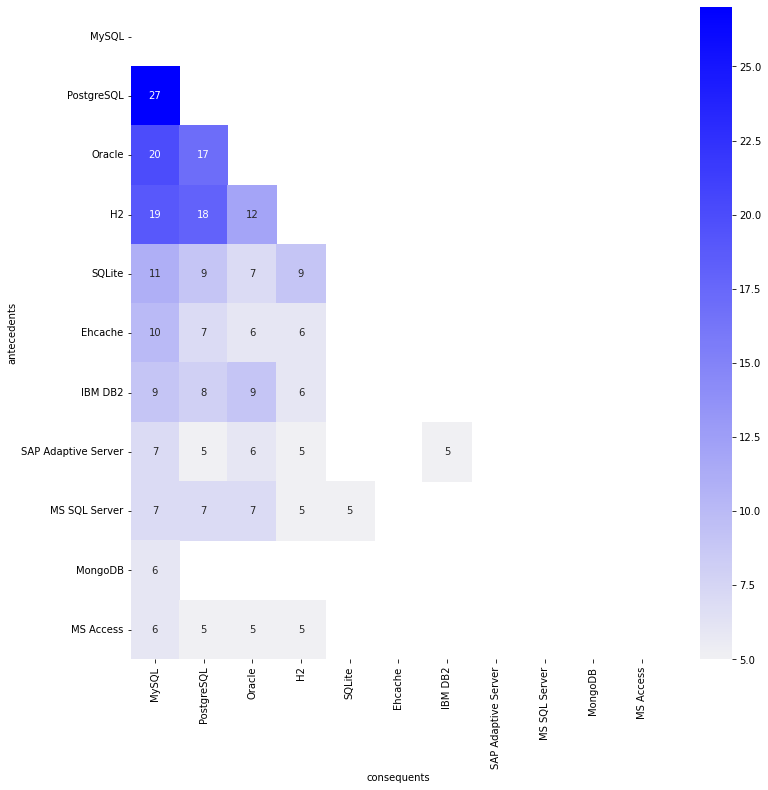

In [10]:
#Generating a heatmap without repetitions, with function ordering, following the tip:
# generate the complete heatmap with the y axis inverted and
# use the parameter mask=np.triu(np.ones_like(df)) in sns.heatmap
import seaborn as sns
pivot = orules1c.pivot(index='antecedents', columns='consequents', values='support_abs')
#pivot = pivot.iloc[::-1]
sns.heatmap(pivot, xticklabels=True, yticklabels=True, cmap=sns.color_palette("light:b", as_cmap=True), annot=True,
    mask=np.triu(np.ones_like(pivot)))
fig = plt.gcf()
fig.set_size_inches(12, 12)

In [120]:
#Test showing the rules without repetitions and with dataframe ordering.
import plotly.express as px 
#rules1cd = rules1c[(rules1c['support'] >= 0.04) & (rules1c['support_abs'] != 0)] 
orules1c['support_abs'] = orules1c['support_abs'].astype(int)
#fig = px.scatter(rules1c.groupby(['antecedent_sup_abs','consequent_sup_abs']).mean().sort_values(['support_abs',], ascending=[False]),
#.sort_values(['support_abs'], ascending=[False])
fig = px.scatter(orules1c.sort_values(['support_abs'], ascending=[False]), x="consequents", y="antecedents", 
#x="consequents", y="antecedents", 
size='support_abs',  color="support_abs", title='Correlation of the most frequent databases in the first version',
hover_data=['support_abs'], color_continuous_scale = ["silver","gray"],text='support_abs') 
#fig.title('Correlation of the most frequent databases')
fig.show()

In [ ]:
#Test by ordering only through support, after dataframe ordering
orules1cd = orules1c.sort_values(by=['support_abs'], ascending=False)
orules1cd

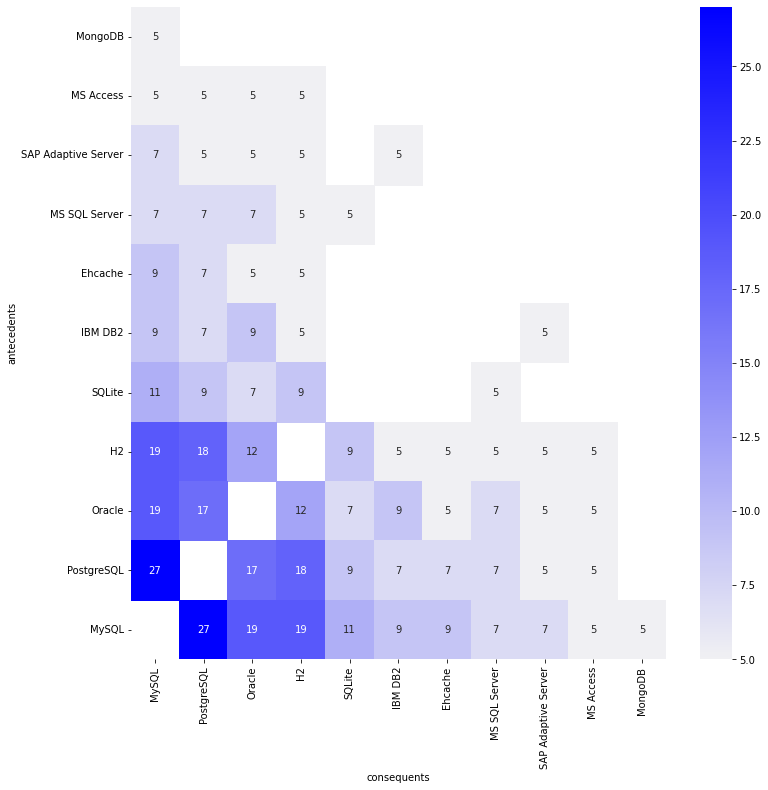

In [36]:
# Heatmap graph generated with all rules and dataframe ordering
# The suggestion for this chart would be to show all rules without filtering by support
import seaborn as sns
pivot = orules1c.pivot(index='antecedents', columns='consequents', values='support_abs')
pivot = pivot.iloc[::-1]
sns.heatmap(pivot, xticklabels=True, yticklabels=True, cmap=sns.color_palette("light:b", as_cmap=True), annot=True)
fig = plt.gcf()
fig.set_size_inches(12, 12)

In [39]:
#Test by ordering only through support, after dataframe ordering
orules1cd = orules1c.sort_values(by=['support_abs'], ascending=False)
orules1cd

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
0,MySQL,PostgreSQL,0.299492,59.0,0.182741,36.0,0.137056,27,0.457627,2.504237,0.082326,1.506821,1.0,1.0
1,PostgreSQL,MySQL,0.182741,36.0,0.299492,59.0,0.137056,27,0.750000,2.504237,0.082326,2.802030,1.0,1.0
4,MySQL,H2,0.299492,59.0,0.157360,31.0,0.096447,19,0.322034,2.046473,0.049318,1.242893,1.0,1.0
5,H2,MySQL,0.157360,31.0,0.299492,59.0,0.096447,19,0.612903,2.046473,0.049318,1.809645,1.0,1.0
2,MySQL,Oracle,0.299492,59.0,0.126904,25.0,0.101523,19,0.338983,2.671186,0.063516,1.320838,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,PostgreSQL,MS Access,0.182741,36.0,0.030457,6.0,0.025381,5,0.138889,4.560185,0.019815,1.125921,1.0,1.0
60,PostgreSQL,SAP Adaptive Server,0.182741,36.0,0.035533,7.0,0.025381,5,0.138889,3.908730,0.018887,1.120026,1.0,1.0
47,MySQL,MongoDB,0.299492,59.0,0.040609,8.0,0.030457,5,0.101695,2.504237,0.018295,1.068001,1.0,1.0
48,MySQL,MS Access,0.299492,59.0,0.030457,6.0,0.030457,5,0.101695,3.338983,0.021335,1.079303,1.0,1.0


PostgreSQL and MySQL being used concurrently in 27 projects, Oracle with PostgreSQL appears in 17 projects, H2 with Oracle in 12 projects, SQLite with H2 in 6 projects, Ehcache with MySQL in 10 projects, Sap Adaptive Server with IBM DB2 in 5 projects, MS SQL Server with SQlite in 5 projects, MongoDB with MySQL in 6 projects, among other combinations.

In the rules below, we list the 10 most frequent BDs as consequents and confidence > 70%, confidence only in the case of relational ones. 
Add rules where they appear as antecedents.

In [11]:
rules2 = df[ (df['consequents'].str.contains('MySQL')) &(df['confidence'] > 0.7)]
rules2

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
34,MS Access,MySQL,0.030457,6.0,0.299492,59.0,0.030457,6.0,1.000,3.338983,0.021335,inf,1,1
36,SAP Adaptive Server,MySQL,0.035533,7.0,0.299492,59.0,0.035533,7.0,1.000,3.338983,0.024891,inf,1,1
37,IBM DB2,MySQL,0.045685,9.0,0.299492,59.0,0.045685,9.0,1.000,3.338983,0.032003,inf,1,1
47,MS SQL Server,MySQL,0.040609,8.0,0.299492,59.0,0.035533,7.0,0.875,2.921610,0.023371,5.604061,1,1
48,Oracle,MySQL,0.126904,25.0,0.299492,59.0,0.101523,20.0,0.800,2.671186,0.063516,3.502538,1,1
51,MongoDB,MySQL,0.040609,8.0,0.299492,59.0,0.030457,6.0,0.750,2.504237,0.018295,2.802030,1,1
53,PostgreSQL,MySQL,0.182741,36.0,0.299492,59.0,0.137056,27.0,0.750,2.504237,0.082326,2.802030,1,1


In [12]:
rules3 = df[(df['consequents'].str.contains('PostgreSQL')) | (df['antecedents'].str.contains('PostgreSQL'))] #(df['confidence'] > 0.7) ]
rules3

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
14,PostgreSQL,IBM DB2,0.182741,36.0,0.045685,9.0,0.040609,8.0,0.222222,4.864198,0.032261,1.226976,1,1
15,IBM DB2,PostgreSQL,0.045685,9.0,0.182741,36.0,0.040609,8.0,0.888889,4.864198,0.032261,7.355330,1,1
16,PostgreSQL,MS SQL Server,0.182741,36.0,0.040609,8.0,0.035533,7.0,0.194444,4.788194,0.028112,1.190968,1,1
17,MS SQL Server,PostgreSQL,0.040609,8.0,0.182741,36.0,0.035533,7.0,0.875000,4.788194,0.028112,6.538071,1,1
18,PostgreSQL,MS Access,0.182741,36.0,0.030457,6.0,0.025381,5.0,0.138889,4.560185,0.019815,1.125921,1,1
19,MS Access,PostgreSQL,0.030457,6.0,0.182741,36.0,0.025381,5.0,0.833333,4.560185,0.019815,4.903553,1,1
26,PostgreSQL,SAP Adaptive Server,0.182741,36.0,0.035533,7.0,0.025381,5.0,0.138889,3.908730,0.018887,1.120026,1,1
27,SAP Adaptive Server,PostgreSQL,0.035533,7.0,0.182741,36.0,0.025381,5.0,0.714286,3.908730,0.018887,2.860406,1,1
28,Oracle,PostgreSQL,0.126904,25.0,0.182741,36.0,0.086294,17.0,0.680000,3.721111,0.063104,2.553934,1,1
29,PostgreSQL,Oracle,0.182741,36.0,0.126904,25.0,0.086294,17.0,0.472222,3.721111,0.063104,1.654288,1,1


In [13]:
rules4 = df[(df['consequents'].str.contains('H2')) & (df['confidence'] > 0.7) ]
rules4

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
12,MS Access,H2,0.030457,6.0,0.15736,31.0,0.025381,5.0,0.833333,5.295699,0.020588,5.055838,1,1
21,SAP Adaptive Server,H2,0.035533,7.0,0.15736,31.0,0.025381,5.0,0.714286,4.539171,0.019789,2.949239,1,1


In [14]:
rules5 = df[(df['consequents'].str.contains('Oracle')) & (df['confidence'] > 0.7) ]
rules5

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
2,IBM DB2,Oracle,0.045685,9.0,0.126904,25.0,0.045685,9.0,1.000000,7.880000,0.039888,inf,1,1
6,MS SQL Server,Oracle,0.040609,8.0,0.126904,25.0,0.035533,7.0,0.875000,6.895000,0.030380,6.984772,1,1
8,SAP Adaptive Server,Oracle,0.035533,7.0,0.126904,25.0,0.030457,6.0,0.857143,6.754286,0.025948,6.111675,1,1
11,MS Access,Oracle,0.030457,6.0,0.126904,25.0,0.025381,5.0,0.833333,6.566667,0.021516,5.238579,1,1


In [15]:
rules6 = df[ (df['consequents'].str.contains('SQLite'))]# & (df['confidence'] > 0.3) ] # 0.7
rules6

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
4,MS SQL Server,SQLite,0.040609,8.0,0.081218,16.0,0.025381,5.0,0.625000,7.695313,0.022083,2.450085,1,1
31,H2,SQLite,0.157360,31.0,0.081218,16.0,0.045685,9.0,0.290323,3.574597,0.032905,1.294647,1,1
32,Oracle,SQLite,0.126904,25.0,0.081218,16.0,0.035533,7.0,0.280000,3.447500,0.025226,1.276086,1,1
42,PostgreSQL,SQLite,0.182741,36.0,0.081218,16.0,0.045685,9.0,0.250000,3.078125,0.030843,1.225042,1,1
55,MySQL,SQLite,0.299492,59.0,0.081218,16.0,0.055838,11.0,0.186441,2.295551,0.031513,1.129336,1,1


In [16]:
rules7 = df[(df['consequents'].str.contains('Ehcache'))]# & (df['confidence'] > 0.7) ]
rules7

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
58,Oracle,Ehcache,0.126904,25.0,0.126904,25.0,0.030457,6.0,0.240000,1.891200,0.014352,1.148811,1,1
60,PostgreSQL,Ehcache,0.182741,36.0,0.126904,25.0,0.035533,7.0,0.194444,1.532222,0.012342,1.083844,1,1
63,H2,Ehcache,0.157360,31.0,0.126904,25.0,0.030457,6.0,0.193548,1.525161,0.010487,1.082640,1,1
64,MySQL,Ehcache,0.299492,59.0,0.126904,25.0,0.050761,10.0,0.169492,1.335593,0.012755,1.051279,1,1


In [17]:
#rules7 = df[ (df['consequents'].str.contains('Redis'))] #& (df['confidence'] > 0.7) ]
rules8 = df[ (df['consequents'].str.contains('IBM DB2'))] #& (df['confidence'] > 0.7) ]
rules8

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
1,SAP Adaptive Server,IBM DB2,0.035533,7.0,0.045685,9.0,0.025381,5.0,0.714286,15.634921,0.023757,3.340102,1,1
3,Oracle,IBM DB2,0.126904,25.0,0.045685,9.0,0.045685,9.0,0.360000,7.880000,0.039888,1.491117,1,1
14,PostgreSQL,IBM DB2,0.182741,36.0,0.045685,9.0,0.040609,8.0,0.222222,4.864198,0.032261,1.226976,1,1
23,H2,IBM DB2,0.157360,31.0,0.045685,9.0,0.030457,6.0,0.193548,4.236559,0.023268,1.183350,1,1
39,MySQL,IBM DB2,0.299492,59.0,0.045685,9.0,0.045685,9.0,0.152542,3.338983,0.032003,1.126091,1,1


In [18]:
#rules9 = df[(df['consequents'].str.contains('MongoDB'))]#& (df['confidence'] > 0.3) ] # 0.7
rules9 = df[ (df['consequents'].str.contains('MS SQL Server'))]# & (df['confidence'] > 0.7) ]
rules9

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
5,SQLite,MS SQL Server,0.081218,16.0,0.040609,8.0,0.025381,5.0,0.312500,7.695313,0.022083,1.395478,1,1
7,Oracle,MS SQL Server,0.126904,25.0,0.040609,8.0,0.035533,7.0,0.280000,6.895000,0.030380,1.332487,1,1
16,PostgreSQL,MS SQL Server,0.182741,36.0,0.040609,8.0,0.035533,7.0,0.194444,4.788194,0.028112,1.190968,1,1
24,H2,MS SQL Server,0.157360,31.0,0.040609,8.0,0.025381,5.0,0.161290,3.971774,0.018990,1.143889,1,1
46,MySQL,MS SQL Server,0.299492,59.0,0.040609,8.0,0.035533,7.0,0.118644,2.921610,0.023371,1.088540,1,1


In [29]:
rules10 = df[ (df['antecedents'].str.contains('SAP Adaptive Server')) | (df['consequents'].str.contains('SAP Adaptive Server'))]# & (df['confidence'] > 0.7) ]
rules10

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
0,IBM DB2,SAP Adaptive Server,0.045685,9.0,0.035533,7.0,0.025381,5.0,0.555556,15.634921,0.023757,2.170051,1,1
1,SAP Adaptive Server,IBM DB2,0.035533,7.0,0.045685,9.0,0.025381,5.0,0.714286,15.634921,0.023757,3.340102,1,1
8,SAP Adaptive Server,Oracle,0.035533,7.0,0.126904,25.0,0.030457,6.0,0.857143,6.754286,0.025948,6.111675,1,1
9,Oracle,SAP Adaptive Server,0.126904,25.0,0.035533,7.0,0.030457,6.0,0.240000,6.754286,0.025948,1.269036,1,1
20,H2,SAP Adaptive Server,0.157360,31.0,0.035533,7.0,0.025381,5.0,0.161290,4.539171,0.019789,1.149941,1,1
21,SAP Adaptive Server,H2,0.035533,7.0,0.157360,31.0,0.025381,5.0,0.714286,4.539171,0.019789,2.949239,1,1
26,PostgreSQL,SAP Adaptive Server,0.182741,36.0,0.035533,7.0,0.025381,5.0,0.138889,3.908730,0.018887,1.120026,1,1
27,SAP Adaptive Server,PostgreSQL,0.035533,7.0,0.182741,36.0,0.025381,5.0,0.714286,3.908730,0.018887,2.860406,1,1
35,MySQL,SAP Adaptive Server,0.299492,59.0,0.035533,7.0,0.035533,7.0,0.118644,3.338983,0.024891,1.094299,1,1
36,SAP Adaptive Server,MySQL,0.035533,7.0,0.299492,59.0,0.035533,7.0,1.000000,3.338983,0.024891,inf,1,1


In [20]:
#rules11 = df[ (df['consequents'] .str.contains('MariaDB'))]# & (df['confidence'] > 0.7) ]
rules11 = df[ (df['consequents'] .str.contains('MS Access'))]# & (df['confidence'] > 0.7) ]
rules11

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
10,Oracle,MS Access,0.126904,25.0,0.030457,6.0,0.025381,5.0,0.200000,6.566667,0.021516,1.211929,1,1
13,H2,MS Access,0.157360,31.0,0.030457,6.0,0.025381,5.0,0.161290,5.295699,0.020588,1.155994,1,1
18,PostgreSQL,MS Access,0.182741,36.0,0.030457,6.0,0.025381,5.0,0.138889,4.560185,0.019815,1.125921,1,1
38,MySQL,MS Access,0.299492,59.0,0.030457,6.0,0.030457,6.0,0.101695,3.338983,0.021335,1.079303,1,1


In [21]:
#rules11 = df[ (df['consequents'] .str.contains('MariaDB'))]# & (df['confidence'] > 0.7) ]
rules12 = df[ (df['consequents'] .str.contains('MongoDB'))]# & (df['confidence'] > 0.7) ]
rules12

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
50,MySQL,MongoDB,0.299492,59.0,0.040609,8.0,0.030457,6.0,0.101695,2.504237,0.018295,1.068001,1,1


Expected Patterns Session
In the rules below, we highlight the dependence presented in opposite directions and the expected correlation.
In first version not occurr expected patterns

In [22]:
rules9 = df[((df['antecedents'].str.contains('MariaDB')) & (df['consequents'].str.contains('MySQL'))) | 
((df['antecedents'].str.contains('MySQL')) & (df['consequents'].str.contains('MariaDB')))]
rules9

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len


In [23]:
rules10 = df2[((df2['antecedents'].str.contains('PostgreSQL')) & (df2['consequents'].str.contains('PostGIS'))) | 
((df2['antecedents'].str.contains('PostGIS')) & (df2['consequents'].str.contains('PostgreSQL')))]
#rules10 = df2[(df2['consequents'].str.contains('PostGIS'))] Este BD nã retornou nas regras
rules10

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len


In [40]:
rules11 = df[ (df['consequents'] .str.contains('MySQL')) & (df['antecedents'] .str.contains('MariaDB'))|
             (df['antecedents'] .str.contains('MySQL')) & (df['consequents'] .str.contains('MariaDB'))] #& (df['confidence'] > 0.7) ]
rules11

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len


In [44]:
rules12 = df[ (df['consequents'] .str.contains('PostgreSQL')) & (df['antecedents'] .str.contains('PostGIS'))|
             (df['antecedents'] .str.contains('PostgreSQL')) & (df['consequents'] .str.contains('PostGIS'))] #& (df['confidence'] > 0.7) ]
rules12

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len


Unexpected Patterns Session
In the rules below we highlight competition and high lift values.

In [45]:
rules13 = df2[(df2['lift'] > 4.5)] #>20
rules13 = rules13.sort_values(['lift'], ascending=False)
rules13

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
0,IBM DB2,SAP Adaptive Server,0.045685,9.0,0.035533,7.0,0.025381,5.0,0.555556,15.634921,0.023757,2.170051,1,1
1,SAP Adaptive Server,IBM DB2,0.035533,7.0,0.045685,9.0,0.025381,5.0,0.714286,15.634921,0.023757,3.340102,1,1
2,IBM DB2,Oracle,0.045685,9.0,0.126904,25.0,0.045685,9.0,1.000000,7.880000,0.039888,inf,1,1
3,Oracle,IBM DB2,0.126904,25.0,0.045685,9.0,0.045685,9.0,0.360000,7.880000,0.039888,1.491117,1,1
4,MS SQL Server,SQLite,0.040609,8.0,0.081218,16.0,0.025381,5.0,0.625000,7.695313,0.022083,2.450085,1,1
5,SQLite,MS SQL Server,0.081218,16.0,0.040609,8.0,0.025381,5.0,0.312500,7.695313,0.022083,1.395478,1,1
6,MS SQL Server,Oracle,0.040609,8.0,0.126904,25.0,0.035533,7.0,0.875000,6.895000,0.030380,6.984772,1,1
7,Oracle,MS SQL Server,0.126904,25.0,0.040609,8.0,0.035533,7.0,0.280000,6.895000,0.030380,1.332487,1,1
8,SAP Adaptive Server,Oracle,0.035533,7.0,0.126904,25.0,0.030457,6.0,0.857143,6.754286,0.025948,6.111675,1,1
9,Oracle,SAP Adaptive Server,0.126904,25.0,0.035533,7.0,0.030457,6.0,0.240000,6.754286,0.025948,1.269036,1,1


In [39]:
#rules13_filter = rules13.to_excel('rules_filters_liftv1.xlsx', index=False)

In [36]:
rules14 = df2[(df2['confidence'] > 0.1)] #>20(['support_abs'], ascending=[False])
rules14 = rules14.sort_values(['lift'], ascending=False)
rules14

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
0,IBM DB2,SAP Adaptive Server,0.045685,9.0,0.035533,7.0,0.025381,5.0,0.555556,15.634921,0.023757,2.170051,1,1
1,SAP Adaptive Server,IBM DB2,0.035533,7.0,0.045685,9.0,0.025381,5.0,0.714286,15.634921,0.023757,3.340102,1,1
2,IBM DB2,Oracle,0.045685,9.0,0.126904,25.0,0.045685,9.0,1.000000,7.880000,0.039888,inf,1,1
3,Oracle,IBM DB2,0.126904,25.0,0.045685,9.0,0.045685,9.0,0.360000,7.880000,0.039888,1.491117,1,1
4,MS SQL Server,SQLite,0.040609,8.0,0.081218,16.0,0.025381,5.0,0.625000,7.695313,0.022083,2.450085,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,Ehcache,PostgreSQL,0.126904,25.0,0.182741,36.0,0.035533,7.0,0.280000,1.532222,0.012342,1.135082,1,1
62,Ehcache,H2,0.126904,25.0,0.157360,31.0,0.030457,6.0,0.240000,1.525161,0.010487,1.108736,1,1
63,H2,Ehcache,0.157360,31.0,0.126904,25.0,0.030457,6.0,0.193548,1.525161,0.010487,1.082640,1,1
64,MySQL,Ehcache,0.299492,59.0,0.126904,25.0,0.050761,10.0,0.169492,1.335593,0.012755,1.051279,1,1


In [ ]:
#if you need to generate the rules in excel
#rules_filter = df2.to_excel('historical_filters.xlsx', index=False)